In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Draw a figure, Single Step

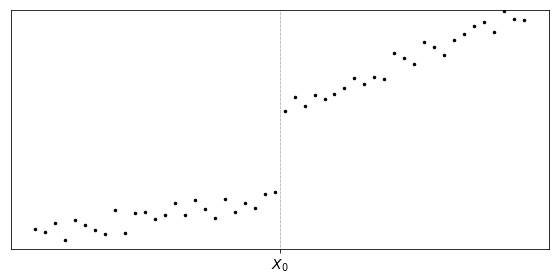

In [3]:
np.random.seed(99)
nran=50
xran=np.linspace(0.5,19.5,nran)
def f(x, x0, a0, b0, a1, b1):
    return np.piecewise(x, 
            [x < x0], [lambda x:a0 + b0*x, 
                       lambda x:a1 + b1*x])
def ytarget(x):
    y=f(x, 10, 3, .75, 10, 2)
    return y
yran=[ytarget(x)+5*(np.random.random()-.5) for x in xran]


plt.scatter(xran,yran,marker=".",s=25,c="k")
plt.xticks([10],["$X_0$"], fontsize="14")

plt.plot([10,10],[0,50],c="k",lw=.5, ls=":")
plt.ylim(0,50);
plt.yticks([],[]);
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(8,4)
fig.savefig("Illustration-of-Data-With-Two-Slopes.pdf")

# One step point, constrained y value

### define target function and random data set

[13.27329261  9.77348959 16.18440831  1.09748136 15.8529493  11.24673097
  6.15482748  1.38721869 19.32192059  0.62968893 15.12606754 14.68857492
  7.67133979  9.88880159 18.15001945  8.01362684 19.00516964 10.46387959
  2.27864877 15.95285984  4.52204893 11.03256991  6.0531132  16.00670484
 16.23280876  4.70997006 12.75185933  2.30845082  8.32160154  2.34043996
  3.23620898  4.53172733  9.55646693  1.9746629   4.96583185  0.62450705
 17.57423955 10.99245411  3.68338593 18.14868549 10.79966628  1.29341209
 10.47265996 12.66270827 15.71250511 16.36345818  5.30001237 18.89719674
  9.35852456  5.51773223]


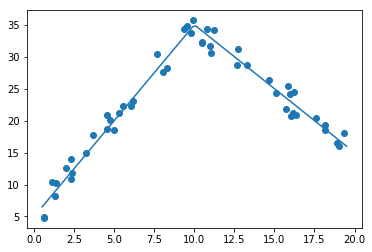

In [4]:
np.random.seed(99)
nran=50
xmin=.5; xmax=19.5
xline = np.linspace(xmin, xmax,100)
xran=np.random.rand(nran)*(xmax-xmin) + xmin
def f(x, X0, y0, b0, b1):
    return np.piecewise(x, 
            [x < X0], [lambda x:y0+b0*(x-X0), 
                       lambda x:y0+b1*(x-X0)])
def ytarget(x):
    y=f(x, 10, 35, 3, -2)
    return y
yran=[ytarget(x)+5*(np.random.random()-.5) for x in xran]
yline=[ytarget(x) for x in xline]
plt.scatter(xran,yran)
plt.plot(xline,yline)
print(xran)

## Optimization Algorithm using optimize

In [5]:
from scipy import optimize

## algorithm suggested by https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python

In [6]:
def f(x, X0, y0, b0,b1):
    return np.piecewise(x, 
            [x < X0], [lambda x:y0+b0*(x-X0), 
                       lambda x:y0+b1*(x-X0)])

In [7]:
parms, covmat = optimize.curve_fit(f, xran, yran,[1,1,1,-1])
print(parms)

[ 9.8439359  34.79551181  3.00921039 -1.92330673]


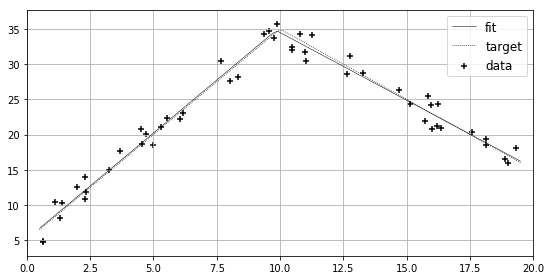

In [8]:
plt.plot(xline,[f(x,*parms) for x in xline],c="k",label="fit",lw=.5)
plt.plot(xline,yline,c="k",ls=":",label="target",lw=.75)
plt.scatter(xran,yran, marker="+",c="k",label="data")
plt.legend(fontsize=12)
plt.grid()
plt.xlim(0,20)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(8,4)
fig.savefig("stepwise-line-two-segments-constrained-fit.pdf")

## Three part function

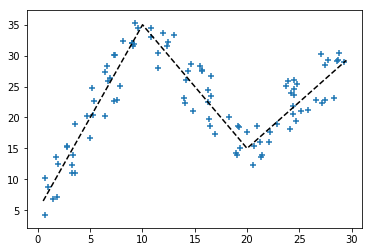

In [9]:
np.random.seed(99)
nran=100

# xdata for plotting
xmin = 0.5; xmax=29.5;
xline=np.linspace(xmin, xmax,300)

# xdata for random seeding
#xran=np.linspace(0.5,29.5,nran)
xran = xmin +(xmax-xmin)*np.random.rand(nran)

# three piece function

def f(x, x0, x1, y0, y1, b0, b1,b2):
    y=np.piecewise(x, 
            [x < x0, (x>=x0)&(x< x1)], 
            [lambda x:y0 + b0*(x-x0),
             lambda x:y1 + b1*(x-x1),
             lambda x:y1 + b2*(x-x1)])
    return(y)

# define target function

def ytarget(x):
    y=f(x, 10, 20, 35, 15, 3, -2, 1.5)
    return y

# plotting data (y axis) for target
yline=[ytarget(x) for x in xline]

# randomized data for curve fit
yran=[ytarget(x)+10*(np.random.random()-.5) for x in xran]

# plot for illustration
plt.plot(xline,yline,c="k",ls="--")
plt.scatter(xran,yran, marker="+")

## perform optimization

need to see parameters with a first guess because otherwise optimize will not converge 

In [10]:
parms, covmat = optimize.curve_fit(f, xran, yran, [9, 21,34,14,1,1,1])
parms

array([ 9.31406281, 20.30857121, 32.99242312, 14.84637362,  3.01395679,
       -1.93773369,  1.65410033])

In [11]:
parms, covmat = optimize.curve_fit(f, xran, yran, [8, 15, 25, 1, 1, -1, 1])
print(parms)

[ 8.99888865 20.49222946 32.02324234 15.16658127  3.00014888 -1.77597516
  1.65071387]


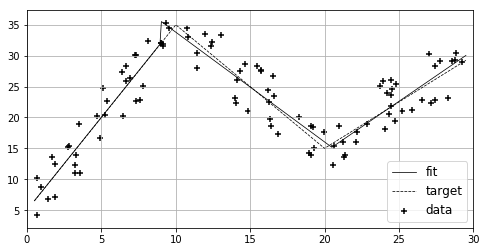

In [12]:
plt.plot(xline,[float(f(u,*parms)) for u in xline],
         label="fit",c="k", lw=.75)

plt.plot(xline,yline,c="k",ls="--",label="target", lw=.75)


plt.scatter(xran,yran,marker="+",c="k",label="data")
plt.xlim(0,30)
plt.legend(fontsize=12,loc="lower right")
plt.grid()
fig=plt.gcf()
fig.set_size_inches(8,4)
plt.savefig("three-point-line-step-fit.pdf")

# One step, unconstrained y value

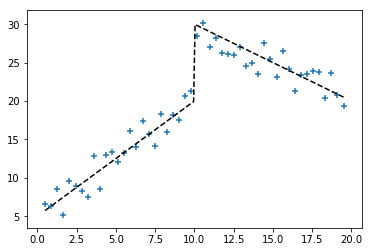

In [69]:
np.random.seed(99)
nran=50
xline=np.linspace(0.5,19.5,200)
xran=np.linspace(0.5,19.5,nran)


def f(x, x0, y0, y1, b0,b1):
    return np.piecewise(x, 
            [x < x0], [lambda x:y0+b0*(x-x0), 
                       lambda x:y1+b1*(x-x0)])

def ytarget(x):
    return f(x, 10, 20, 30, 1.5, -1 )

yline=[ytarget(x) for x in xline]
yran=[ytarget(x)+5*(np.random.random()-.5) for x in xran]
plt.plot(xline,yline,c="k",ls="--")
plt.scatter(xran,yran, marker="+")

In [70]:
parms, covmat = optimize.curve_fit(f, xran, yran, [8,15,25,1,-1])
parms

array([10.19387744, 21.5015197 , 26.39042311,  1.67933918, -0.41477884])

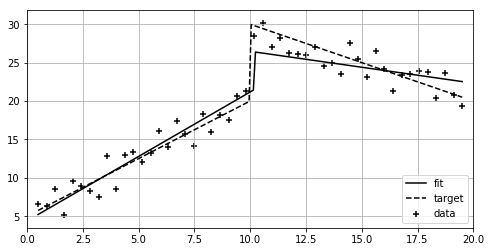

In [71]:
plt.plot(xline,[float(f(u,*parms)) for u in xline],
         label="fit",c="k")

plt.plot(xline,yline,c="k",ls="--",label="target")


plt.scatter(xran,yran,marker="+",c="k",label="data")
plt.xlim(0,20)
plt.legend(fontsize=10,loc="lower right")
plt.grid()
fig=plt.gcf()
fig.set_size_inches(8,4)

y=a+bx formulation

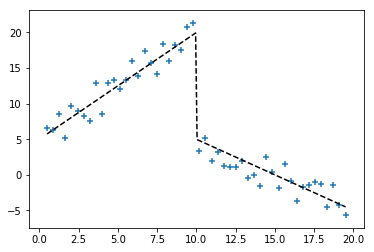

In [72]:
np.random.seed(99)
nran=50
xline=np.linspace(0.5,19.5,200)
xran=np.linspace(0.5,19.5,nran)


def f(x, x0, a0,a1, b0,b1):
    return np.piecewise(x, 
            [x < x0], [lambda x:a0+b0*x, 
                       lambda x:a1+b1*x])

def ytarget(x):
    return f(x, 10, 5, 15, 1.5, -1 )

yline=[ytarget(x) for x in xline]
yran=[ytarget(x)+5*(np.random.random()-.5) for x in xran]
plt.plot(xline,yline,c="k",ls="--")
plt.scatter(xran,yran, marker="+")

In [73]:
parms, covmat = optimize.curve_fit(f, xran, yran, [10.5,4,12,1,-1])
parms

/home/mathman/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([10.5       ,  6.37194069, 11.51170553,  1.15989211, -0.79185231])

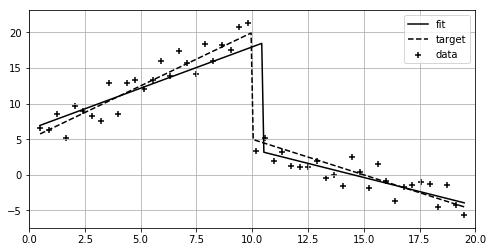

In [74]:
plt.plot(xline,[float(f(u,*parms)) for u in xline],
         label="fit",c="k")

plt.plot(xline,yline,c="k",ls="--",label="target")


plt.scatter(xran,yran,marker="+",c="k",label="data")
plt.xlim(0,20)
plt.legend(fontsize=10,loc="upper right")
plt.grid()
fig=plt.gcf()
fig.set_size_inches(8,4)

## Nonline Stepwise Fit

In [13]:
cd "../data"

/home/mathman/Desktop/MLPB/data


In [14]:
import pandas as pd
data=pd.read_csv("flux-and-sunspot.txt", sep='\t')
data[:7]

,YEAR,Month,Flux,Sunspot
0,1947,2,202.75,188.9
1,1947,3,226.29,183.8
2,1947,4,264.15,212.1
3,1947,5,261.17,285.0
4,1947,6,217.54,232.1
5,1947,7,207.23,223.5
6,1947,8,231.21,267.4


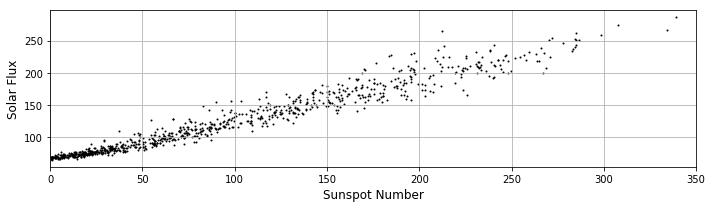

In [15]:
plt.scatter(data["Sunspot"],data["Flux"],s=1,c="k")
plt.xlabel("Sunspot Number", fontsize=12)
plt.ylabel("Solar Flux", fontsize=12)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,3)
plt.xlim([0,350]);
fig=plt.gcf()
fig.tight_layout()
fig.savefig("flux-vs-sunspot-data-only.pdf")

In [16]:
X=np.array(data["Sunspot"]); Y=np.array(data["Flux"])


In [17]:
def f(x, X0, a, b, c):
    return np.piecewise(x, 
            [x < X0], [lambda x:a*x*x+b*x+c, 
                       lambda x:(c-a*X0*X0)+(2*a*X0+b)*x])

f(2,10,1,1,1)

array(7)

In [18]:
parameters, covmatrix=optimize.curve_fit(f,X, Y, [10, 1, 1, 1])
print(parameters)

[4.30630230e+01 4.41052396e-03 2.75549590e-01 6.84111542e+01]


In [19]:
X0,a,b,c=parameters
print("The solution is: ")
#print("X0=",X0)
#print("a=",a)
#print("b=",b)
#print("c=",c)
print(round(a,5),"x**2 + ",round(b,5),
      "x + ", round(c,5), ", x <", round(X0,2))
#print("c-a*X0**2=",c-a*X0**2)
#print("2 a X0+b=",2*a*X0+b)
print(round(c-a*X0**2,5),"+",round(2*a*X0+b,5),"x, x>",round(X0,2))

The solution is: 
0.00441 x**2 +  0.27555 x +  68.41115 , x < 43.06
60.23217 + 0.65541 x, x> 43.06


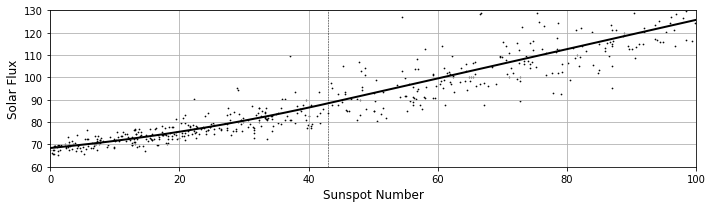

In [20]:
xplot=np.linspace(0,350,351)
yplot=[f(x,*parameters) for x in xplot]

plt.scatter(data["Sunspot"],data["Flux"],s=.5,c="k")
plt.plot(xplot,yplot,c="black",lw=2)
plt.xlim(0,100); plt.ylim(60,130)
plt.plot([X0,X0],[60,150],c="k",ls="--",lw=.5)
plt.xlabel("Sunspot Number", fontsize=14)
plt.ylabel("Solar Flux", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,3)
fig.tight_layout()
fig.savefig("flux-vs-sunspot-with-fit.pdf")


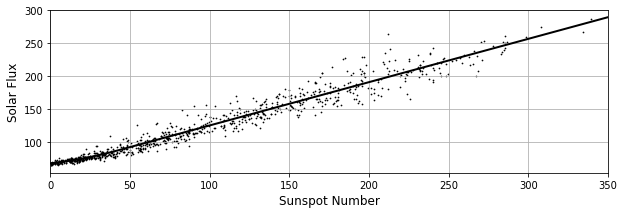

In [21]:
plt.scatter(data["Sunspot"],data["Flux"],s=.5,c="k")
plt.plot(xplot,yplot,c="black",lw=2)

plt.xlabel("Sunspot Number", fontsize=12)
plt.ylabel("Solar Flux", fontsize=12)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,3)
plt.xlim([0,350]);

In [22]:
year=np.array(data["YEAR"])
month=np.array(data["Month"])
date=year+((month-0.5)/12.0)

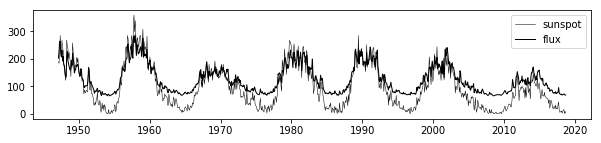

In [23]:
plt.plot(date,X,label="sunspot",lw=0.5,c="k")
plt.plot(date,Y,label="flux",lw=1,c="k")
plt.legend(loc="upper right")
fig=plt.gcf()
fig.set_size_inches(10,2)

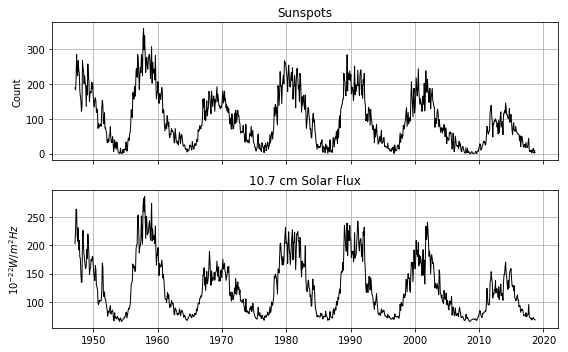

In [24]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True)
ax[0].plot(date,X,label="sunspot",lw=1,c="k")
ax[0].set_title("Sunspots")
ax[0].set_ylabel("Count")
ax[1].plot(date,Y,label="flux",lw=1,c="k")
ax[1].set_title("10.7 cm Solar Flux")
ax[1].set_ylabel("$10^{-22} W/m^2Hz$")
ax[0].grid()
ax[1].grid()
fig.set_size_inches(8,5)
fig.tight_layout()
fig.savefig("Solar-Flux-and-Sunspots-vs-Time.pdf")

In [275]:
data

,YEAR,Month,Flux,Sunspot
0,1947,2,202.75,188.9
1,1947,3,226.29,183.8
2,1947,4,264.15,212.1
3,1947,5,261.17,285.0
4,1947,6,217.54,232.1
5,1947,7,207.23,223.5
6,1947,8,231.21,267.4
7,1947,9,192.03,239.9
8,1947,10,209.05,231.7
9,1947,11,179.83,181.3
